**Loading and Inspecting the Dataset**

In [1]:
# Import necessary libraries
import pandas as pd

# Load the dataset from your Google Drive
file_path = '/content/spam.csv'  # Update this path if needed
spam_data = pd.read_csv(file_path, encoding='latin1')

# Display the first few rows of the dataset
spam_data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Cleaning the Dataset**

In [2]:
# Remove the unnecessary columns
spam_data_cleaned = spam_data[['v1', 'v2']]

# Rename the columns for easier understanding
spam_data_cleaned.columns = ['label', 'message']

# Display the first few rows of the cleaned dataset
spam_data_cleaned.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


 **Encoding the Labels**

In [5]:
# Correct encoding of labels
spam_data_cleaned['label'] = spam_data[['v1']].copy()
spam_data_cleaned['label'] = spam_data_cleaned['label'].map({'ham': 0, 'spam': 1})

# Display the first few rows of the dataset to verify the encoding
spam_data_cleaned.head()


,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


** Splitting the Data into Training and Testing Sets**

In [6]:
# Import necessary library for splitting the data
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(spam_data_cleaned['message'], spam_data_cleaned['label'], test_size=0.2, random_state=42)

# Display the size of the training and testing sets
len(X_train), len(X_test)


(4457, 1115)

**Vectorizing the Text Data**

In [7]:
# Import the TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform both training and testing data
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Display the shape of the transformed data
X_train_vectorized.shape, X_test_vectorized.shape


((4457, 7735), (1115, 7735))

**Training a machine learning model**

In [8]:
# Import the Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

# Initialize the model
model = MultinomialNB()

# Train the model on the vectorized training data
model.fit(X_train_vectorized, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test_vectorized)

# Display the first few predictions
y_pred[:10]


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

**Evaluating Model Performance**

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.96
Precision: 1.00
Recall: 0.72
F1 Score: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



**Confusion Matrix**

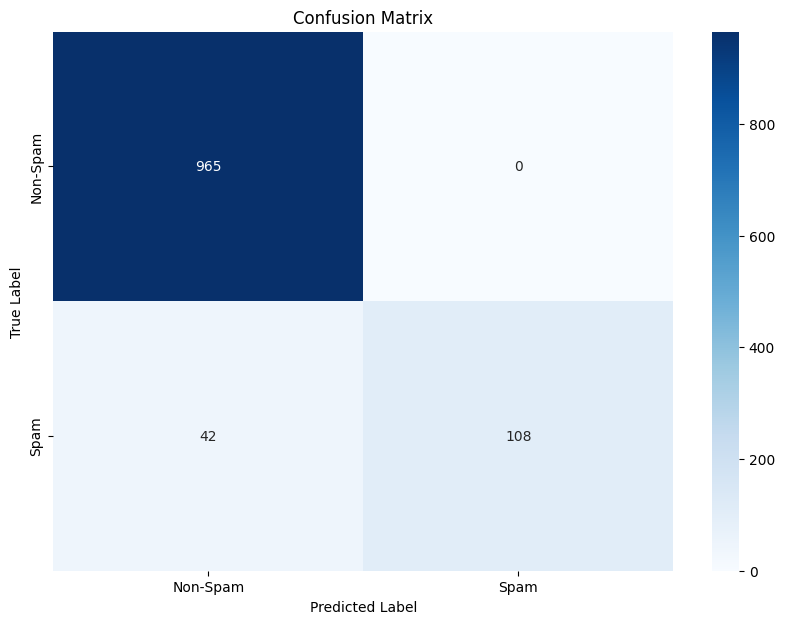

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Spam', 'Spam'],
            yticklabels=['Non-Spam', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
